In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
# Import some files

"""bin0_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc')
bin1_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc')
bin0_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc_binEdges')
bin1_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc_binEdges')
bin0_weighted = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc_weighted')
bin1_weighted = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc_weighted') 

bin0_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmean')[1:]
bin1_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmean')[1:]
bin0_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmean_binEdges')[1:]
bin1_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmean_binEdges')[1:]                         

DESY1_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmc')
DESY1_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmean')
DESY1_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmc_binEdges')
DESY1_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmean_binEdges')

lenz = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/lens_z')[1:]
lenz_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/lens_binEdges')[1:]
redmagicz = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/redMaGiC_z')[1:]
redmagicz_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/redMaGiC_binEdges')[1:]"""


# And the higher-resolution ones we need to calculate F as a function of scale - these are not weighted by (1+m_i)
lens_highres_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/lensEdges')#[1:]
bin0_highres_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source0Edges')
bin1_highres_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source1Edges')

lens_highres_vals = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/lensBinned')#[1:]
bin0_highres_vals = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source0Binned')
bin1_highres_vals = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/source1Binned')

# Load the ones I've produced directly from catalogue using Charlie's code - these are weighted by (1+m_i) per galaxy
binA_edges_mb = np.loadtxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binA_edges.dat')
binB_edges_mb = np.loadtxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binB_edges.dat')

binA_vals_mb = np.loadtxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binA_dNdz.dat')
binB_vals_mb = np.loadtxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binB_dNdz.dat')

In [4]:
print(bin0_highres_edges.shape)
print(bin0_highres_vals.shape)

print(binA_edges_mb.shape)
print(binA_vals_mb.shape)

(10001,)
(10000,)
(10001,)
(10000,)


In [ ]:
# Import some bigger files

#bin0_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_photo-zError')
#bin1_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_photo-zError')
#DESY1_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_photo-zError')

In [5]:
# From the bin edges, get bin centres
def bins_mid(bin_edges):
    """ Gets the middle of each linearly-spaced bin."""

    bin_centers=np.zeros(len(bin_edges)-1)
    for i in range(0,len(bin_edges)-1):
        bin_centers[i]    =       (bin_edges[i+1] - bin_edges[i])/2. + bin_edges[i]

    return bin_centers

In [25]:
# Get bin centres
bin0_highres_cent = bins_mid(bin0_highres_edges)
bin1_highres_cent = bins_mid(bin1_highres_edges)

binA_cent = bins_mid(binA_edges_mb)
binB_cent = bins_mid(binB_edges_mb)

lens_cent = bins_mid(lens_highres_edges)

In [7]:
print(bin0_highres_cent.shape, bin1_highres_cent.shape)
print(binA_cent.shape, binB_cent.shape)

(10000,) (10000,)
(10000,) (10000,)


In [24]:
#np.savetxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/lens_centres.dat', lens_highres_cent)
#np.savetxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/bin0_centres.dat', bin0_highres_cent)
#np.savetxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/bin1_centres.dat', bin1_highres_cent)
np.savetxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binA_centres.dat', binA_cent)
np.savetxt('./txtfiles/photo_z_test/weighted_dNdz_w_mbias/binB_centres.dat', binB_cent)


In [37]:
lens_cent_plot= np.append(np.append(np.linspace(0,0.3,100), lens_cent), np.linspace(0.45, 1.5, 100))
lens_vals_plot = np.append(np.append(np.zeros(100), lens_highres_vals), np.zeros(100))

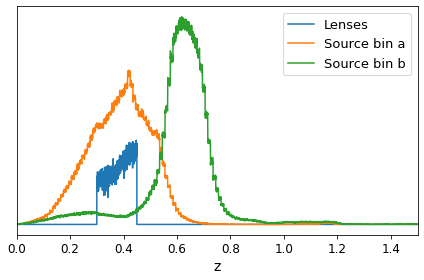

In [45]:
plt.figure()
plt.plot(lens_cent_plot, lens_vals_plot / sum(lens_vals_plot)/2, label='Lenses' )
plt.plot(bin0_highres_cent,bin0_highres_vals/ sum(bin0_highres_vals), label='Source bin a')
plt.plot(bin1_highres_cent,bin1_highres_vals / sum(bin1_highres_vals), label='Source bin b')
plt.xlabel('z', fontsize=14)
plt.xlim(0,1.5)
plt.yticks([])
plt.xticks(fontsize=12)
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('./dNdz_3samples.pdf')
#plt.show()

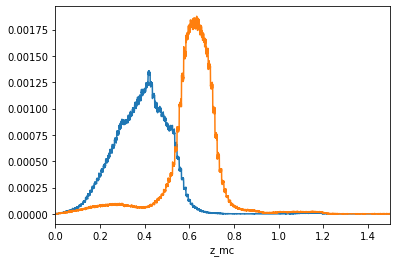

In [11]:
plt.figure()
plt.plot(binA_cent,binA_vals_mb/ sum(binA_vals_mb))
plt.plot(binB_cent,binB_vals_mb / sum(binB_vals_mb))
plt.xlabel('z_mc')
plt.xlim(0,1.5)
#plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmc_dists.png')
plt.show()

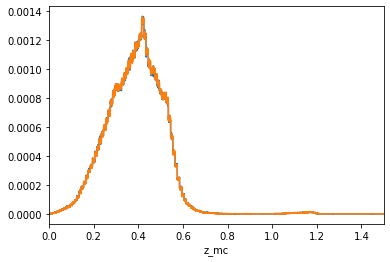

In [12]:
plt.figure()
plt.plot(bin0_highres_cent,bin0_highres_vals/ sum(bin0_highres_vals))
plt.plot(binA_cent,binA_vals_mb/ sum(binA_vals_mb))
plt.xlabel('z_mc')
plt.xlim(0,1.5)
#plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmc_dists.png')
plt.show()

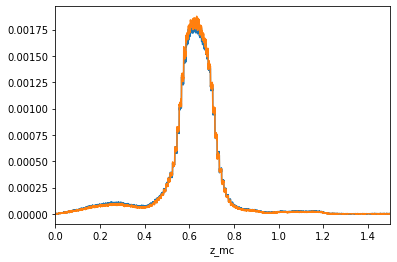

In [13]:
plt.figure()
plt.plot(bin1_highres_cent,bin1_highres_vals / sum(bin1_highres_vals))
plt.plot(binB_cent,binB_vals_mb / sum(binB_vals_mb))
plt.xlabel('z_mc')
plt.xlim(0,1.5)
#plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmc_dists.png')
plt.show()

In [20]:
mean_binA_mb = scipy.integrate.simps(binA_vals_mb*binA_cent/sum(binA_vals_mb))
mean_bin0 = scipy.integrate.simps(bin0_highres_vals*bin0_highres_cent / sum(bin0_highres_vals))

In [21]:
print(mean_binA_mb)
print(mean_bin0)

0.39248659400307556
0.39285690584063077


In [22]:
mean_binB_mb = scipy.integrate.simps(binB_vals_mb*binB_cent/sum(binB_vals_mb))
mean_bin1 = scipy.integrate.simps(bin1_highres_vals*bin1_highres_cent / sum(bin1_highres_vals))

In [23]:
print(mean_binB_mb)
print(mean_bin1)

0.6238892472287637
0.6239321249256493
